### Initialize the environment

In [176]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/AML_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [178]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [179]:
run=3
date_time='2017-02-20_2053' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [180]:
config

{u'dbns': {u'GE': {u'batchSize': 1,
   u'datafile': u'AML/AML_gene_expression_table2.csv.gz',
   u'epochs': [20, 800],
   'inputNodes': 19937,
   u'k': 1,
   u'lambdas': [0.0, 1.0],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': False},
  u'ME': {u'batchSize': 1,
   u'datafile': u'AML/AML_miRNA_Seq_table2.csv.gz',
   u'epochs': [20],
   'inputNodes': 559,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.005],
   u'persistent': False},
  u'SM': {u'batchSize': 1,
   u'datafile': u'AML/AML_somatic_mutations_table2.csv.gz',
   u'epochs': [20, 800],
   'inputNodes': 1686,
   u'k': 1,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [200, 20],
   u'lr': [0.01, 0.1],
   u'persistent': False}},
 u'p': 0.5,
 u'pathways': [u'ME', u'GE', u'SM'],
 u'runs': 4,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 100,
  u'k': 1,
  u'layersNodes': [24, 3],
  u'lr': [0.1, 0.1],
  u'persistent': False},
 u'uuid': u'1b702

### Load the dataset and visualize the input of the pathways

In [181]:
datafiles = main.prepare_TCGA_datafiles("AML",config,data_dir)

### Look at the joint layer representation

In [182]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

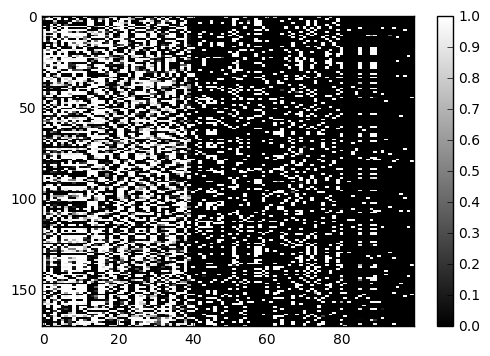

In [183]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

In [184]:
joint_layer[1:10,1:10]

array([[  9.99777615e-01,   9.99981284e-01,   4.86486824e-03,
          9.99916852e-01,   4.19499911e-02,   9.99998868e-01,
          9.98933148e-03,   2.94002146e-03,   9.41659212e-01],
       [  1.13767223e-03,   1.22223064e-04,   8.30338299e-01,
          2.50999467e-03,   3.26797436e-03,   8.78935829e-02,
          1.95137467e-02,   9.92347598e-01,   4.28622037e-01],
       [  5.75407781e-03,   1.16700642e-02,   4.22767431e-01,
          1.90850208e-03,   8.51643927e-05,   6.48794975e-03,
          9.02271152e-01,   4.39675525e-03,   4.99893446e-03],
       [  4.05914290e-03,   9.94922101e-01,   1.55976813e-05,
          9.97659624e-01,   8.18733213e-07,   3.28398347e-01,
          6.36358280e-03,   3.53054522e-04,   1.10504143e-05],
       [  2.98989151e-04,   6.75475657e-01,   9.99855876e-01,
          7.19347954e-05,   9.99166667e-01,   9.99480426e-01,
          9.97621894e-01,   9.99004245e-01,   9.99586046e-01],
       [  6.00908052e-08,   9.94180679e-01,   1.76478027e-10,
   

### Check the weights distributions

([array([  0.00000000e+00,   3.00000000e+00,   3.47000000e+02,
           2.76800000e+03,   7.10600000e+03,   6.63900000e+03,
           2.72800000e+03,   3.44000000e+02,   2.00000000e+00,
           0.00000000e+00]),
  array([    0.,    28.,   667.,  3916.,  7273.,  5139.,  2173.,   674.,
            67.,     0.]),
  array([    0.,    49.,   977.,  4268.,  6707.,  5271.,  2244.,   392.,
            29.,     0.]),
  array([  0.00000000e+00,   6.00000000e+00,   4.33000000e+02,
           2.87600000e+03,   6.71400000e+03,   6.59000000e+03,
           2.84100000e+03,   4.63000000e+02,   1.40000000e+01,
           0.00000000e+00]),
  array([    0.,    62.,   835.,  4123.,  8467.,  4613.,  1511.,   313.,
            13.,     0.]),
  array([    0.,    12.,   792.,  5027.,  9122.,  4163.,   786.,    35.,
             0.,     0.]),
  array([  0.00000000e+00,   8.40000000e+01,   9.57000000e+02,
           3.58600000e+03,   6.53200000e+03,   5.87900000e+03,
           2.52700000e+03,   3.6700000

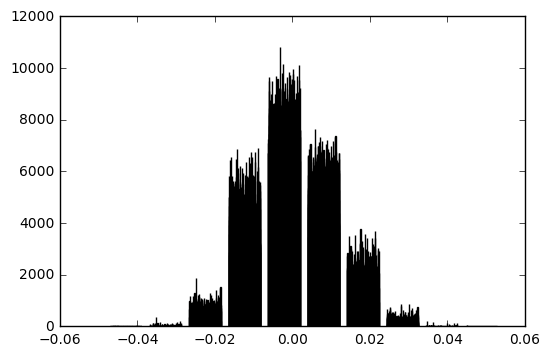

In [185]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x17fd2dd50>,
 <a list of 3 Text xticklabel objects>)

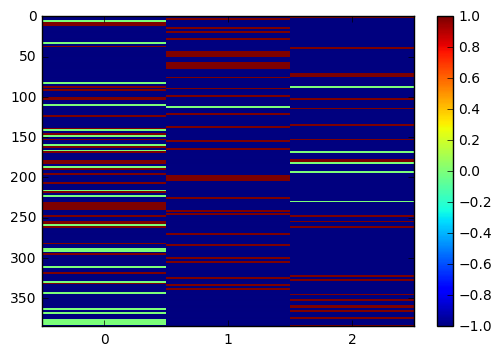

In [186]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x17baf9b90>,
 <a list of 3 Text xticklabel objects>)

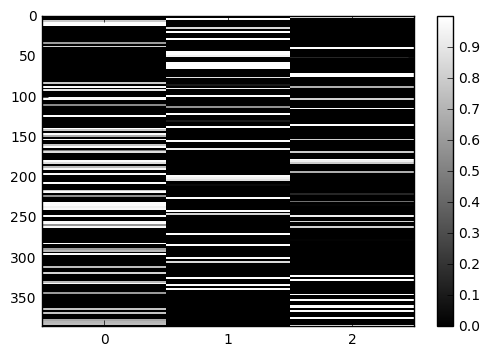

In [187]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0],cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 117.,    0.,    0.,    0.,    0.,    4.,    5.,   13.,    4.,   27.]),
  array([ 136.,    2.,    0.,    0.,    0.,    1.,    0.,    0.,    5.,   26.]),
  array([ 141.,    2.,    0.,    0.,    1.,    0.,    2.,    2.,    4.,   18.])],
 array([ 0.        ,  0.09999716,  0.19999431,  0.29999147,  0.39998863,
         0.49998578,  0.59998294,  0.6999801 ,  0.79997725,  0.89997441,
         0.99997157]),
 <a list of 3 Lists of Patches objects>)

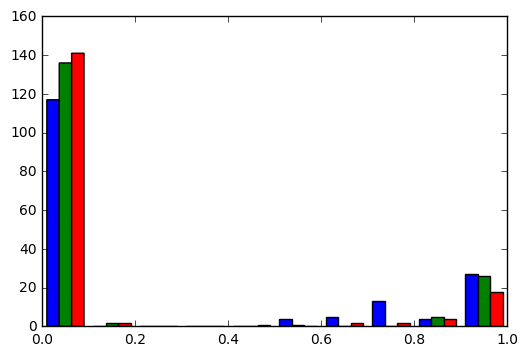

In [188]:
plt.hist(top_output)

In [189]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [190]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([ 68.,  17.,  32.,  44.,   9.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <a list of 5 Patch objects>)

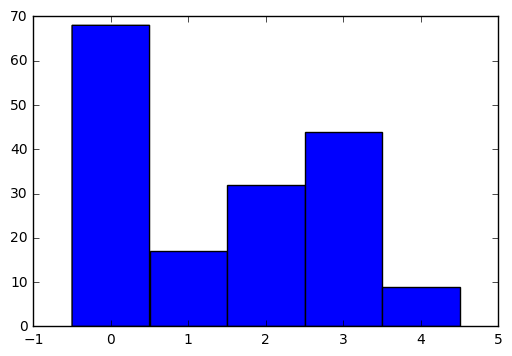

In [191]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [192]:
import csv
import gzip
id=[]
filename='../data/'+datafiles['ME']
if filename.endswith('.gz'):
    openfun=gzip.open
else:
    openfun=open
with openfun(filename) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [193]:
stat={}
with open('../data/AML/AML_clinical_data2.csv') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        patient_id=row[0]
        stat[patient_id]=(row[4],row[7],row[6])

In [194]:
import re
time_list = []
event_list = []
group_list = []
DEAD=1
ALIVE=0
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(DEAD)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(ALIVE)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
No data for TCGA-AB-2887
No data for TCGA-AB-2891
No data for TCGA-AB-2918
No data for TCGA-AB-2921
No data for TCGA-AB-2930
No data for TCGA-AB-2940
No data for TCGA-AB-2943
No data for TCGA-AB-2946
No data for TCGA-AB-2975


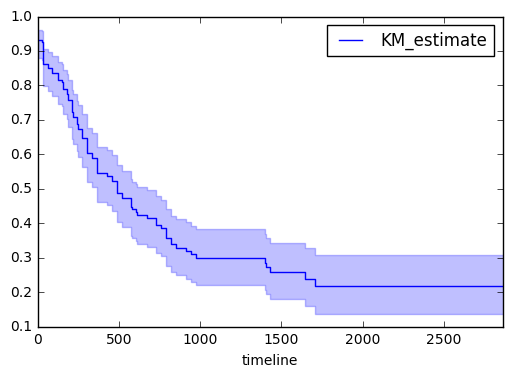

In [195]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

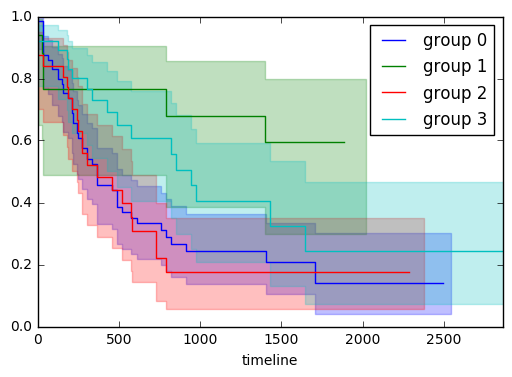

In [196]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in [1,2,3]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)